<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Part one (data analysis)`**

## Part 1: Data Analysis

In this part, we start by loading the dataset from our GitHub repository and visualizing the basic distributions of the categorical variables **Gender** and **CLASS**. These plots help us understand the balance of the data before preprocessing.





**Uploading data and viewing some samples :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df_copy= df.copy() # the one used for for data of cleaning (preprocessed)

print("Loaded shape:", df.shape) # to show the number of columns and rows
print("\nHead:")
print(df.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


**1.1 Five number summery :**

In [2]:
df.describe() # for showing the five number summery (statistical summury)

ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000000     0.300000     0.200000     0.300000   
25%       6.500000     4.000000     1.500000     0.900000     1.800000   
50%       8.000000     4.800000     2.000000     1.100000     2.500000   
75%      10.200000     5.600000     2.900000     1.300000     3.300000   
max      16.000000    10.300000    13.800000     9.900000     9.900000   

              VLDL          BMI  
count  1000.000000  1000.000000  
mean      1.854700    29.578020  
std       3.663599     4.962388  
min       0.100000    19.000000  
25%       0.700000    26.000000  
50%       0.900000    30.000000  
75%       1.500000    33.000000  
max      35.000000    47.750000

**1.1 calculate the variance :**

In [3]:
cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
df[cols].var()

AGE        77.426643
Urea        8.615196
Cr       3598.169921
HbA1c       6.421172
Chol        1.694521
TG          1.963294
HDL         0.436146
LDL         1.243452
VLDL       13.421960
BMI        24.625296
dtype: float64

This code calculates the variance for all numeric attributes in the dataset.
The results show how much each variable deviates from its mean value.
 Some columns like ID or No_Pation have very large variances because they are identifiers,
 while attributes such as AGE, Chol, and BMI show realistic spread in their values.

**1.2 Graphs:**

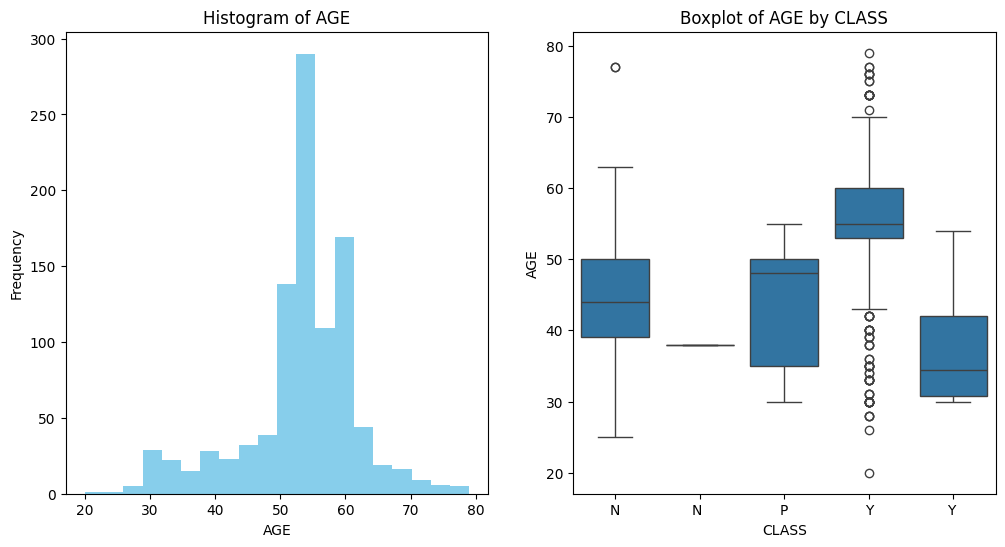

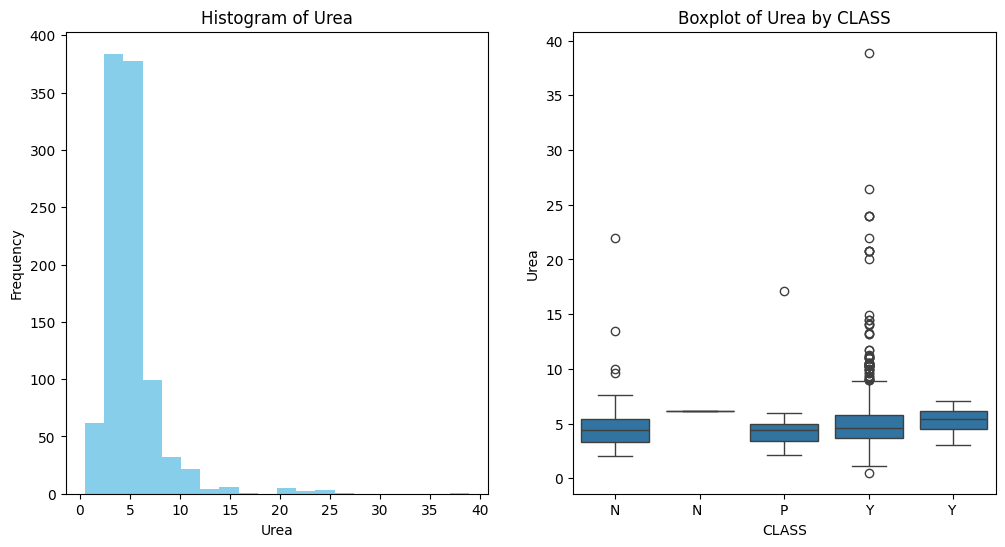

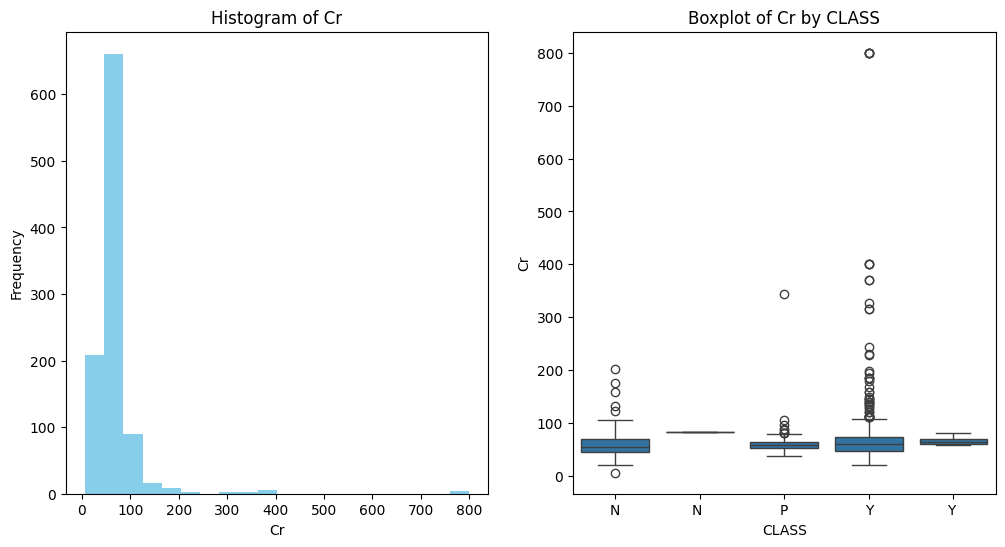

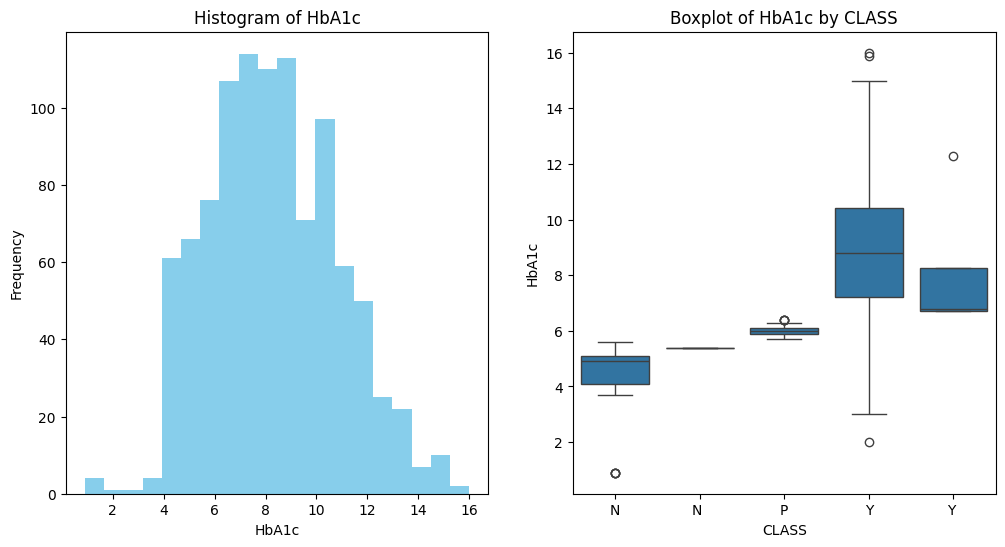

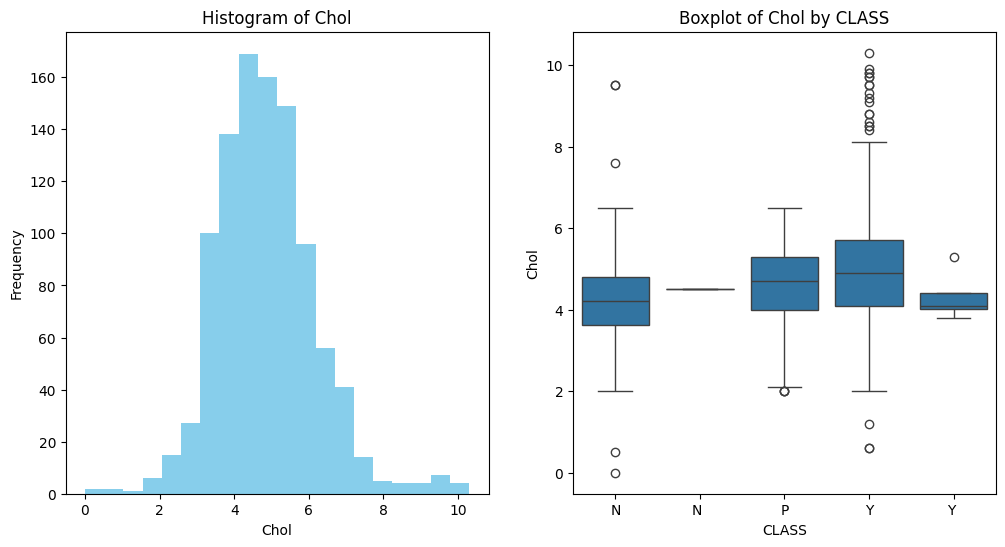

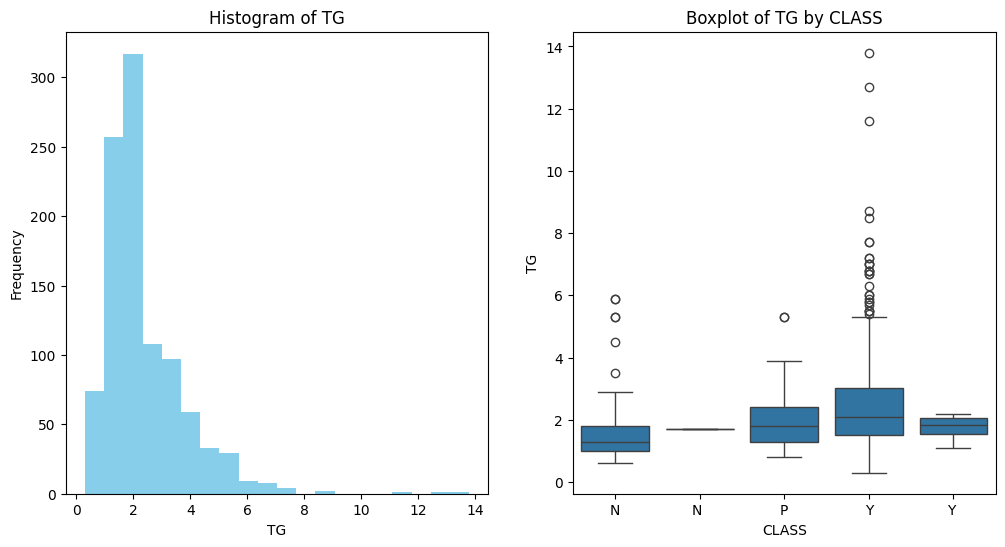

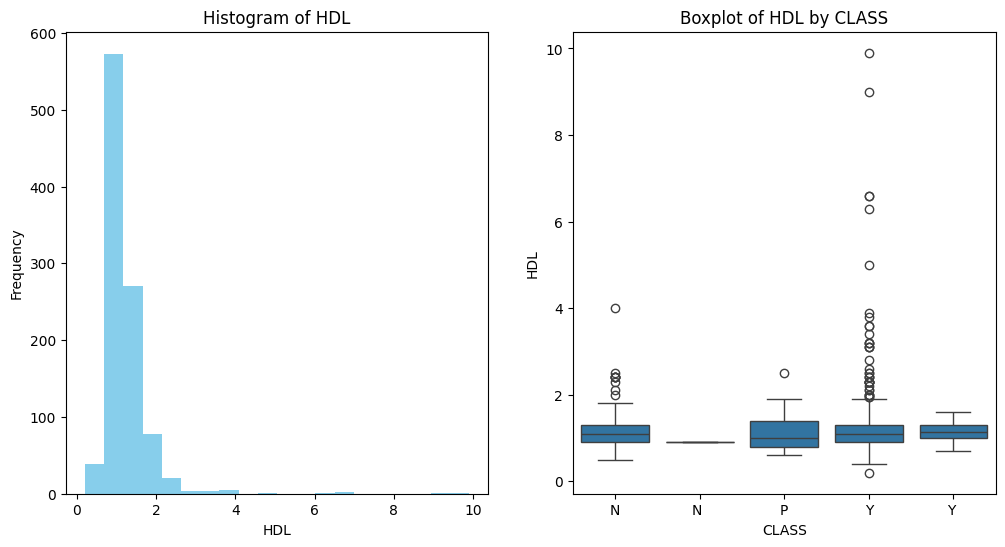

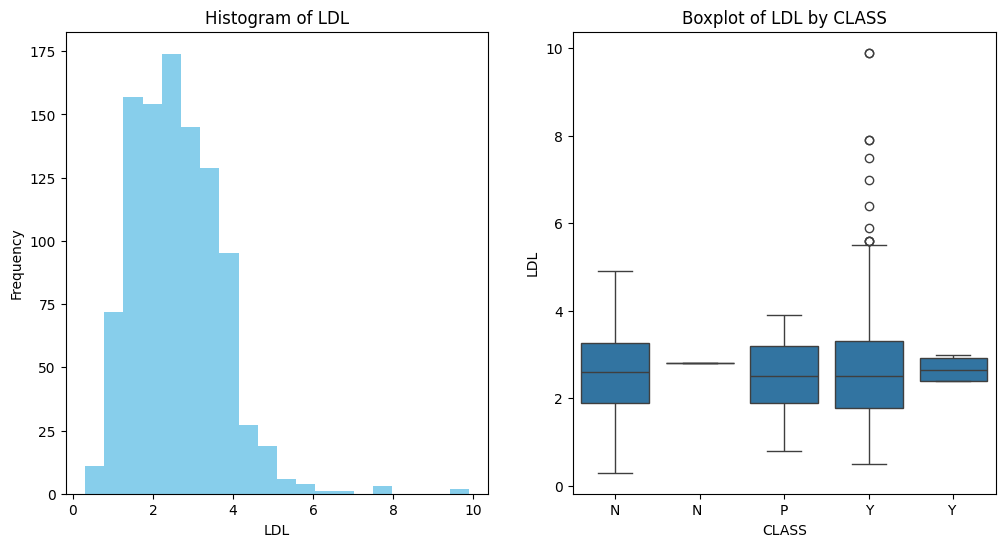

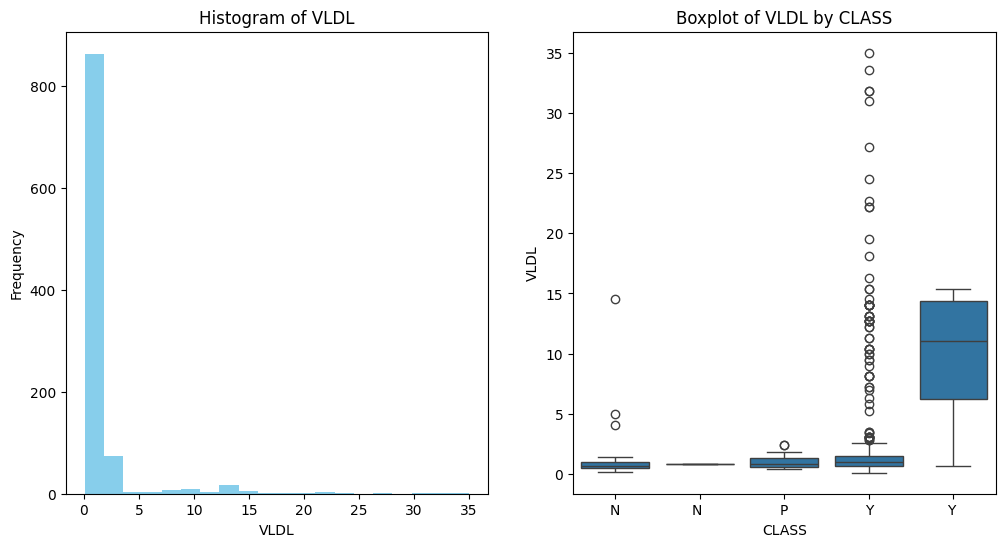

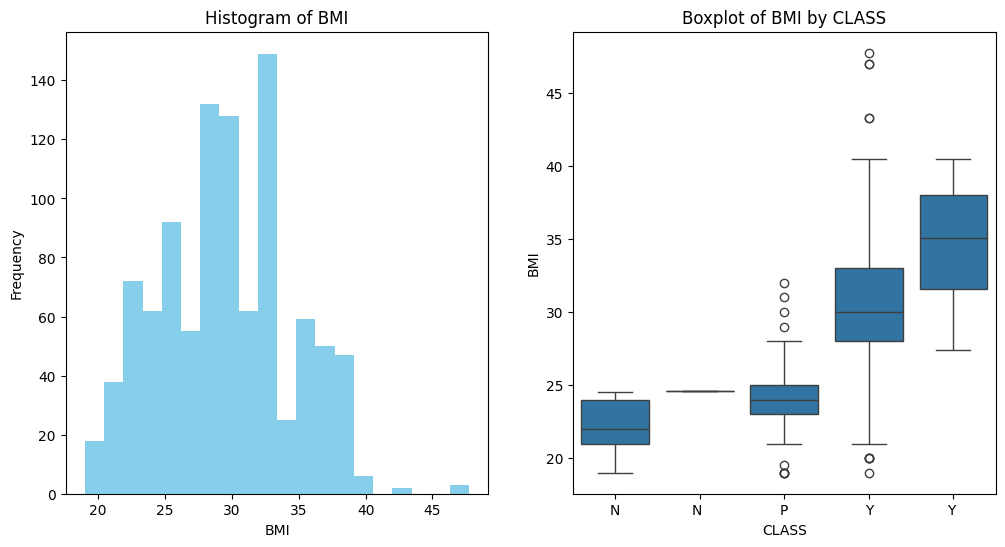

In [4]:

import seaborn as sns


numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "No_Pation"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()


















The attributes ID and No_Pation were excluded from the visualizations because they are only identifier fields. They do not provide any statistical or meaningful information about the patients or their diabetes condition. Therefore, only relevant numerical and categorical features were included in the graphs.

 **graph description**

--------------------------------------------------------------------------------
üîπAGE
The histogram of AGE shows that most values are centered in the middle range, with a fairly balanced spread. The boxplot indicates the presence of a few outliers, mainly within the ‚ÄúY‚Äù class. During preprocessing, these outliers will be handled, and normalization will help maintain consistent scaling among features.

--------------------------------------------------------------------------------

üîπ UREA
The histogram of UREA shows a strong right skew, where most values are clustered near the lower end. The boxplot reveals several outliers spread across the classes. This attribute will require both outlier handling and normalization to balance the distribution and reduce the skew effect.

--------------------------------------------------------------------------------

üîπ CR
The histogram of CR displays heavy skewness, with most data points near smaller values and a few extremely high ones. The boxplot highlights many outliers, especially in the ‚ÄúY‚Äù class. This feature clearly requires outlier treatment and normalization to stabilize the range and minimize distortion.

--------------------------------------------------------------------------------

üîπ HbA1C
The histogram of HbA1C appears moderately distributed, though slightly skewed. The boxplot shows some visible outliers in the ‚ÄúY‚Äù class and other. It will benefit from normalization and light outlier adjustment to ensure balanced scaling across all classes.

--------------------------------------------------------------------------------

üîπ CHOL
The histogram of CHOL shows a slightly right-skewed distribution, where most values are centered but extend slightly toward higher levels. The boxplot reveals outliers, especially within the ‚ÄúY‚Äù class and other. This indicates moderate variation and suggests that normalization and outlier handling will help improve data consistency during preprocessing.

--------------------------------------------------------------------------------

üîπ TG
The histogram of TG is strongly skewed to the right, with most values concentrated at low levels. The boxplot shows numerous outliers, particularly in the ‚ÄúY‚Äù class. This variable clearly requires outlier handling and normalization during preprocessing to improve balance and consistency.

--------------------------------------------------------------------------------

üîπ HDL
The histogram of HDL shows sharp skewness, with most values concentrated near the lower end. The boxplot displays several outliers across all classes. This feature will need both normalization and outlier treatment to reduce skew and achieve smoother scaling.

--------------------------------------------------------------------------------

üîπ LDL
The histogram of LDL shows a mild skew, with values leaning toward the lower side. The boxplot reveals a few moderate outliers across y class. Applying normalization and light outlier handling will help in keeping the attribute aligned with others.

--------------------------------------------------------------------------------

üîπ VLDL
The histogram of VLDL indicates extreme skewness, with most data tightly packed near zero. The boxplot reveals a high concentration of outliers, especially in the ‚ÄúY‚Äù class. This attribute strongly requires outlier treatment and normalization to reduce scale distortion and improve data uniformity.

--------------------------------------------------------------------------------

üîπ BMI
The histogram of BMI shows a moderate and fairly even spread, though slightly skewed. The boxplot indicates that the ‚ÄúY‚Äù have outliers and p. This attribute will require normalization to align the scales and light outlier treatment to remove inconsistencies.

--------------------------------------------------------------------------------

During this part , we noticed that some values were repeated in different letter cases (e.g., uppercase and lowercase). This inconsistency will be cleaned in the next preprocessing step to ensure uniform text formatting and accurate analysis, also some classes show a higher number than other need to take it in consideration in the preprocessing to be fair .

--------------------------------------------------------------------------------

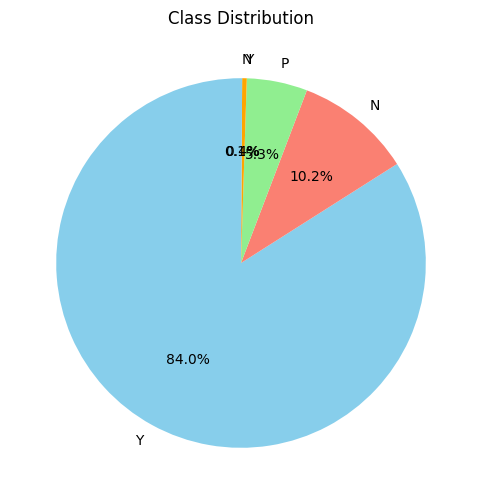

In [5]:
# Plot showing class label distributions
plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'],
    startangle=90
)
plt.title("Class Distribution")
plt.ylabel('')
plt.show()



Pie chart for **class distribution**: shows the proportion of each class, indicating an imbalance between the categories.


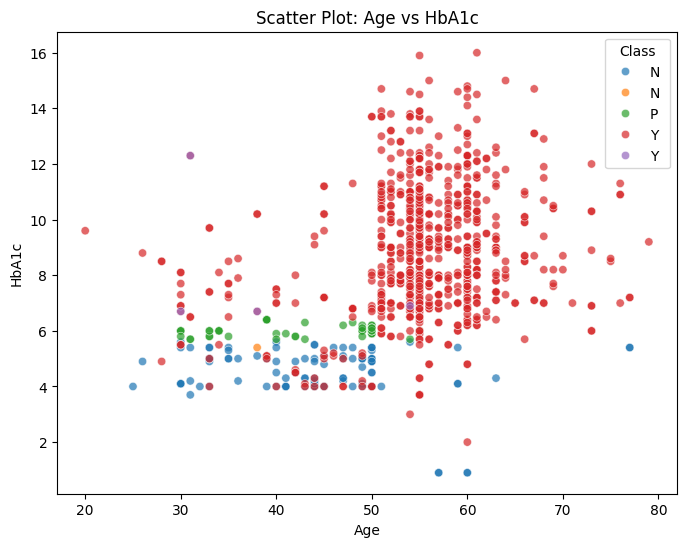

In [6]:
# scatter plot (Age vs HbA1c)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AGE'], y=df['HbA1c'], hue=df['CLASS'], alpha=0.7)
plt.title("Scatter Plot: Age vs HbA1c")
plt.xlabel("Age")
plt.ylabel("HbA1c")
plt.legend(title="Class")
plt.show()


The scatter plot illustrates the relationship between Age and HbA1c levels among the patients in the dataset.
It shows that individuals classified as diabetic (labeled P and Y) tend to cluster at higher HbA1c values (greater than 6.5), especially among patients aged 50 and above.
In contrast, non-diabetic individuals (labeled N) appear mostly below this threshold, indicating better blood sugar control.
This pattern suggests that age is associated with higher HbA1c levels, reflecting reduced glucose regulation and a higher prevalence of diabetes in older age groups.

### 1.4 Distribution of Gender and CLASS

The following bar plots show how many males and females exist in the dataset, and how the samples are distributed among the classes (N, P, Y).


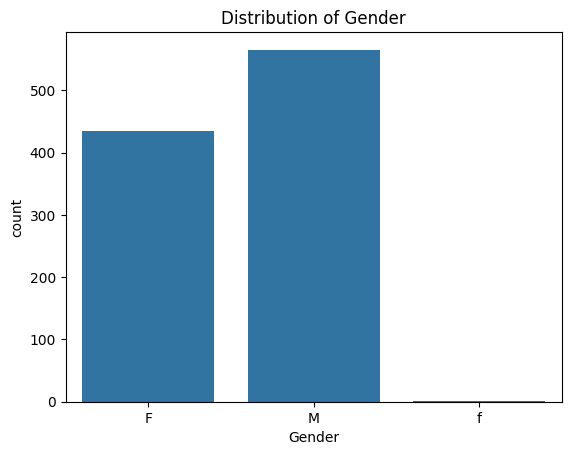

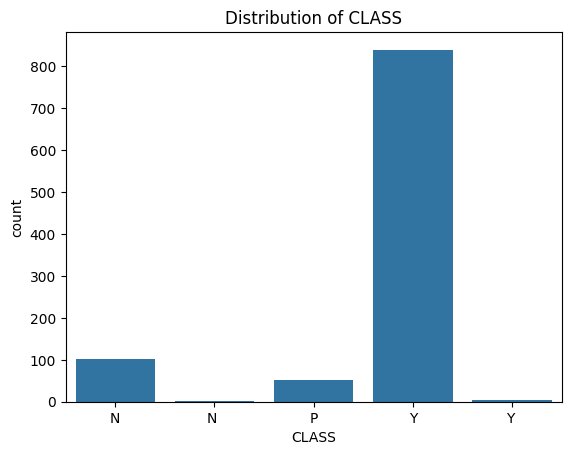

In [7]:
# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Bar plot for CLASS
sns.countplot(x='CLASS', data=df)
plt.title("Distribution of CLASS")
plt.show()


**1.5 Missing values:**

In [8]:

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


that all attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) have  missing values which is 0 . This indicates that the dataset is complete with no missing data, and therefore no imputation or preprocessing is required for missing values.Note: The ID column is an identifier only and is not used for prediction. It has no missing values, which confirms that all records are properly indexed.

## Part 2: Data Preprocessing  

In this part, we focus on improving the quality and consistency of the dataset before analysis. The preprocessing stage ensures that the data is clean, accurate, and suitable for the next phases of the project.  





**`Overview of Data Preprocessing Tasks`**


1. **Noise Removal:** This process involves identifying and handling missing values, detecting and removing outliers, and deleting duplicate records. These steps reduce data errors and make the dataset more reliable.
2.    **Normalization:** All numerical attributes are scaled to a common range to prevent large values from dominating smaller ones, helping models perform more accurately.


1.   **Correlation Analysis:** The relationships between different attributes are examined to identify how variables are connected and to avoid redundancy.



1.    **Discretization and Encoding:** Continuous numerical attributes are divided into categories, and categorical attributes are encoded into numerical form to make the data more suitable for machine learning algorithms.
2.   **Feature Selection and Final Dataset:** The most important features are selected to improve performance and efficiency. After completing all preprocessing steps, the final preprocessed dataset is saved for later use in the project.











### **2.1 Noise Removal**

1. **Checking for Missing Values**

In this part, the dataset is examined to identify whether any attributes contain missing or null values.
Detecting missing values is an important step before performing other preprocessing tasks because missing data can affect the accuracy of the analysis.
After running the check, it was found that all attributes in the dataset have zero missing values.

In [9]:
#Check for missing values in the entire dataset
missing = df_copy.isna().sum()

#displaying the results
print("Missing values in each column:\n")
print(missing)

print("\ntotal number of missing values in the dataset:",missing.sum())


Missing values in each column:

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

total number of missing values in the dataset: 0


Although the initial missing value check showed that there were no missing values in the dataset, a further inspection revealed that some attributes contained zero or negative values.
Since these values are not realistic for medical measurements, they were treated as missing values.


In [10]:
# Columns that must be strictly positive (> 0)
pos_cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

df_copy = df.copy()

# Replace values (<=0) with NaN
for c in pos_cols:
    df_copy.loc[df_copy[c] <= 0, c] = pd.NA


print("missing values (by marking impossible zeros/negatives):")
print(df_copy[pos_cols].isna().sum())


missing values (by marking impossible zeros/negatives):
AGE      0
Urea     0
Cr       0
HbA1c    0
Chol     1
TG       0
HDL      0
LDL      0
VLDL     0
BMI      0
dtype: int64


In [11]:
# Calculate the mean for each column
column_means = df_copy.mean(numeric_only=True)

# Replace missing values with the mean of each column
df_copy = df_copy.fillna(column_means)

# Display the DataFrame after filling missing values
print("\nDataFrame after replacing missing values with column means:")
print(df_copy.head())
print(df_copy.shape)



DataFrame after replacing missing values with column means:
    ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
(1000, 14)


Only values that cannot be valid (zeros or negatives in strictly-positive medical attributes) are marked as missing (NaN).  
After that, missing values are handled using by replacing the NaN with the average value of each column.


2. **Detecting and Removing Outliers**

In this part, the dataset is checked for extreme values that are far from the normal range.  
Outliers can affect the accuracy of analysis and may lead to incorrect results if not handled properly.  


Outlier Detection Comparison: Mean Method vs. IQR Method  

Two different methods were tested for detecting and removing outliers: the **Mean Method** and the **Interquartile Range (IQR) Method**.  
The Mean Method was tested first, but it did not give satisfactory results for this dataset, as it removed too few records and did not detect all the extreme values.  
Therefore, the IQR Method was used instead, as it provided a more accurate detection of outliers.


In [12]:
print("Detecting and Removing Outliers using the Mean Method (for explanation only)")
print("This method was not used in preprocessing ‚Äî only shown for clarification.\n")

df_mean_demo = df_copy.copy()
numeric_cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

for c in numeric_cols:
    mean = df_mean_demo[c].mean()
    differences_from_mean = abs(df_mean_demo[c] - mean)
    max_difference_index = differences_from_mean.idxmax()
    df_mean_demo = df_mean_demo.drop(max_difference_index)

print("Original shape:", df_copy.shape)
print("Shape after demo removals (Mean Method):", df_mean_demo.shape)
print("\nSample of data after demonstration:")
print(df_mean_demo.head())


Detecting and Removing Outliers using the Mean Method (for explanation only)
This method was not used in preprocessing ‚Äî only shown for clarification.

Original shape: (1000, 14)
Shape after demo removals (Mean Method): (990, 14)

Sample of data after demonstration:
    ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M  26.0   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [13]:
print("Detecting and Removing Outliers using the IQR Method")


# Select only numeric columns
df_numeric = df_copy.select_dtypes(include=['number'])

# Calculate IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outlier rows detected:", outliers.sum())

# Remove outliers
print("Original shape:", df_copy.shape)
df_copy = df_copy[~outliers]
print("New shape after removing outliers:", df_copy.shape)

# Small sample
print("\nSample of cleaned data")
print(df_copy.head())


Detecting and Removing Outliers using the IQR Method
Number of outlier rows detected: 371
Original shape: (1000, 14)
New shape after removing outliers: (629, 14)

Sample of cleaned data
     ID  No_Pation Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
5   634      34224      F  45.0   2.3  24.0    4.0   2.9  1.0  1.0  1.5   0.4   
6   721      34225      F  50.0   2.0  50.0    4.0   3.6  1.3  0.9  2.1   0.6   
7   421      34227      M  48.0   4.7  47.0    4.0   2.9  0.8  0.9  1.6   0.4   
13  132      34234      F  45.0   4.6  54.0    5.1   4.2  1.7  1.2  2.2   0.8   
14  402      34235      F  50.0   3.5  39.0    4.0   4.0  1.5  1.2  2.2   0.7   

     BMI CLASS  
5   21.0     N  
6   24.0     N  
7   24.0     N  
13  23.0     N  
14  24.0     N  


In [14]:
# Ensure CLASS column is uppercase and spaces removed
df_copy['CLASS'] = df_copy['CLASS'].str.strip().str.upper()
df_copy['Gender'] = df_copy['Gender'].str.strip().str.upper()
print("Unique values in CLASS column after cleaning and converting to uppercase:")
print(df_copy['CLASS'].unique())
print(" values in  gender column after cleaning and converting to uppercase:")
print(df_copy['Gender'].unique())

Unique values in CLASS column after cleaning and converting to uppercase:
['N' 'P' 'Y']
 values in  gender column after cleaning and converting to uppercase:
['F' 'M']


In this step, the CLASS column was standardized to ensure consistency before performing further preprocessing tasks. Some records contained class labels in lowercase or with extra spaces (e.g., ‚Äúy‚Äù or ‚ÄúY ‚Äù), which could lead to mismatches during data analysis. To resolve this, all values in the CLASS column were converted to uppercase, and any surrounding spaces were removed. This guarantees that the labels are uniform and prevents issues such as duplicated records or incorrect groupings in later preprocessing stages.

3. **Detecting and Removing Duplicate Records**

In this part, the dataset is examined to check if any duplicate records exist, which could occur if the same patient‚Äôs information was entered more than once.  
After running the check, no duplicate rows were found in the dataset, confirming that each patient record is unique and that the data is already clean and consistent.


In [15]:
print("\nChecking and removing duplicate rows")
dups = df_copy.duplicated().sum()
print("Number of duplicate rows:", dups)

if dups > 0:
    df_copy = df_copy.drop_duplicates()
    print("Duplicates removed. New shape:", df_copy.shape)
else:
    print("No duplicate rows found.")




Checking and removing duplicate rows
Number of duplicate rows: 0
No duplicate rows found.



### **2.2 Normalization**




In [16]:

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['BMI', 'Urea', 'Cr','Chol', 'TG', 'HDL', 'LDL', 'VLDL','HbA1c']
data_to_normlize = df_copy[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normlized_data_minmax = minmax_scaler.fit_transform(data_to_normlize)

# Replace the normalized values in the original DataFrame
df_copy[columns_to_normalize] = normlized_data_minmax

print("Min-Max scaled data:")
print(df_copy.head())



Min-Max scaled data:
     ID  No_Pation Gender   AGE      Urea        Cr     HbA1c      Chol  \
5   634      34224      F  45.0  0.157895  0.023810  0.153846  0.152542   
6   721      34225      F  50.0  0.118421  0.333333  0.153846  0.271186   
7   421      34227      M  48.0  0.473684  0.297619  0.153846  0.152542   
13  132      34234      F  45.0  0.460526  0.380952  0.238462  0.372881   
14  402      34235      F  50.0  0.315789  0.202381  0.153846  0.338983   

          TG       HDL       LDL      VLDL   BMI CLASS  
5   0.148936  0.400000  0.183673  0.142857  0.10     N  
6   0.212766  0.333333  0.306122  0.238095  0.25     N  
7   0.106383  0.333333  0.204082  0.142857  0.25     N  
13  0.297872  0.533333  0.326531  0.333333  0.20     N  
14  0.255319  0.533333  0.326531  0.285714  0.25     N  


 Normalization technique was applied to the numerical columns ( Urea, Cr, HbA1c, Chol, TG, HDL, BMI) to scale their values within the range of 0 to 1.
This process aims to eliminate differences in measurement scales between variables and enhance the accuracy of statistical analysis and subsequent models.
After applying normalization, all selected columns were transformed to the same range, making it easier to compare features without larger values dominating the results.

#### **Discretization**

In [17]:
#Discretization for column (Age)
columns_to_Discretize = 'AGE'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df_copy['AgeGroup'] = pd.cut(df_copy[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df_copy[['AGE' ,'AgeGroup']])

original DataFrame:
      AGE AgeGroup
5    45.0    31-50
6    50.0    31-50
7    48.0    31-50
13   45.0    31-50
14   50.0    31-50
..    ...      ...
965  54.0   51-100
973  50.0    31-50
978  52.0   51-100
991  55.0   51-100
999  54.0   51-100

[629 rows x 2 columns]


We applied **discretization** to the "**Age**" column, grouping it into meaningful ranges: [0‚Äì30, 31‚Äì50, 51‚Äì100]. This reduces noise, makes the data easier to interpret, and helps the model capture patterns more effectively than using raw continuous values.

### **2.3 Encoding**

In [18]:
le = LabelEncoder()
df_copy['Gender'] = le.fit_transform(df_copy['Gender'])
df_copy['CLASS'] = le.fit_transform(df_copy['CLASS'])
print(df_copy)

      ID  No_Pation  Gender   AGE      Urea        Cr     HbA1c      Chol  \
5    634      34224       0  45.0  0.157895  0.023810  0.153846  0.152542   
6    721      34225       0  50.0  0.118421  0.333333  0.153846  0.271186   
7    421      34227       1  48.0  0.473684  0.297619  0.153846  0.152542   
13   132      34234       0  45.0  0.460526  0.380952  0.238462  0.372881   
14   402      34235       0  50.0  0.315789  0.202381  0.153846  0.338983   
..   ...        ...     ...   ...       ...       ...       ...       ...   
965  159      45446       1  54.0  0.513158  0.785714  0.369231  0.796610   
973  170      45395       1  50.0  0.486842  0.571429  0.461538  0.542373   
978  176      45445       1  52.0  0.526316  0.571429  0.384615  0.932203   
991  195       4543       0  55.0  0.394737  0.142857  0.915385  0.576271   
999  248      24054       1  54.0  0.513158  0.535714  0.376923  0.305085   

           TG       HDL       LDL      VLDL   BMI  CLASS AgeGroup  
5    0.

**Encoding** was applied to the "**CLASS**" and "**Gender**" columns, converting their categorical values into numeric form. This ensures all data is numeric, consistent, and ready for analysis and modeling.

### **2.4 Correlation**

 **1. correlation coefficient (for numric attributes)**

In [19]:

import pandas as pd
import numpy as np




# Calculate the correlation matrix for numeric columns only
correlation_matrix =df_copy.corr(numeric_only=True)


# Loop through all numeric column pairs
print(" print all correlatied pairs : \n")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]   # define first column name
        col2 = correlation_matrix.columns[j]   # define second column name
        corr_value =correlation_matrix.iloc[i, j]  # get correlation value
        print(f"{col1} ‚Üî {col2} = {corr_value:.3f}")


# Set the threshold for high correlation
correlation_threshold = 0.75

# Find all pairs of attributes with correlation >= 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)

# Get all numeric column names
numeric_attributes = list(df_copy.select_dtypes(include='number'))

# Create a set to store attributes that will be removed
attributes_to_remove =set()


# Loop through correlated pairs and mark one attribute from each pair
for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

# Print the attributes that have high correlation before removing them
print(" \n Highly correlated attributes :")
print(attributes_to_remove)

# Remove the highly correlated attributes from the dataset
df_filtered = df_copy.drop(columns=attributes_to_remove)

# Print the original and filtered dataframes
print("\nOriginal Data:")
print(df)
print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)




 print all correlatied pairs : 

No_Pation ‚Üî ID = -0.005
Gender ‚Üî ID = -0.002
Gender ‚Üî No_Pation = 0.034
AGE ‚Üî ID = -0.026
AGE ‚Üî No_Pation = -0.052
AGE ‚Üî Gender = -0.002
Urea ‚Üî ID = -0.065
Urea ‚Üî No_Pation = -0.012
Urea ‚Üî Gender = 0.177
Urea ‚Üî AGE = 0.156
Cr ‚Üî ID = -0.088
Cr ‚Üî No_Pation = 0.041
Cr ‚Üî Gender = 0.353
Cr ‚Üî AGE = 0.053
Cr ‚Üî Urea = 0.529
HbA1c ‚Üî ID = 0.007
HbA1c ‚Üî No_Pation = 0.031
HbA1c ‚Üî Gender = -0.086
HbA1c ‚Üî AGE = 0.424
HbA1c ‚Üî Urea = -0.001
HbA1c ‚Üî Cr = -0.148
Chol ‚Üî ID = 0.017
Chol ‚Üî No_Pation = 0.090
Chol ‚Üî Gender = -0.083
Chol ‚Üî AGE = 0.058
Chol ‚Üî Urea = -0.038
Chol ‚Üî Cr = -0.006
Chol ‚Üî HbA1c = 0.142
TG ‚Üî ID = -0.088
TG ‚Üî No_Pation = 0.042
TG ‚Üî Gender = -0.025
TG ‚Üî AGE = 0.070
TG ‚Üî Urea = -0.014
TG ‚Üî Cr = 0.026
TG ‚Üî HbA1c = 0.151
TG ‚Üî Chol = 0.405
HDL ‚Üî ID = -0.036
HDL ‚Üî No_Pation = -0.049
HDL ‚Üî Gender = -0.087
HDL ‚Üî AGE = -0.022
HDL ‚Üî Urea = -0.044
HDL ‚Üî Cr = -0.082
HDL ‚Üî HbA1c = 

This part of the code computes the correlation matrix between all numeric features in the dataset and prints the correlation values for each pair that includes VLDL. The results show that VLDL has  positive correlations with TG ,and a negative correlation with HDL. After checking for highly correlated pairs using the defined threshold (0.75), the program printed an empty set set() as shown, indicating that no attribute pairs exceeded the correlation limit chosen.

**2. chi squared (for the catogrical attributes )**

In [20]:
from scipy.stats import chi2_contingency


# Create a  table for Gender and CLASS
table = pd.crosstab(df_copy['Gender'], df_copy['CLASS'])
print("the table:")
print(table)

# Perform the chi-square test
chi2_, p_value, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2_)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Expected Frequencies:")
print(expected)

the table:
CLASS    0   1    2
Gender             
0       29   7  267
1       18  18  290
Chi-Square Statistic: 7.5332537903412335
Degrees of Freedom: 2
p-value: 0.023129951602102464
Expected Frequencies:
[[ 22.64069952  12.04292528 268.3163752 ]
 [ 24.35930048  12.95707472 288.6836248 ]]



This code performs a Chi-Square test between Gender and CLASS.
 The p-value indicates whether there is a statistically significant relationship.

 If p-value ‚â§ 0.05 ‚Üí reject H0 (there is a relationship),  (as shown )

 If p-value > 0.05 ‚Üí fail to reject H0 (no significant relationship).

### **2.5 Feature Selection**

In [21]:
# --- Feature Selection using Filter Method (ANOVA F-test) ---

import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# 0) Target (assumes CLASS is already present and encoded text-wise; we encode to integers for safety)
y_text = df_copy['CLASS'].astype(str).str.strip().str.upper()
y = LabelEncoder().fit_transform(y_text)

# 1) Features: drop IDs / target / obvious non-features
cols_to_drop = ['CLASS', 'ID', 'No_Pation', 'AgeGroup']  # AgeGroup is categorical text if present
X = df_copy.drop(columns=cols_to_drop, errors='ignore')

# 2) Keep numeric columns only (ANOVA needs numeric inputs)
X = X.select_dtypes(include=['number']).copy()

# 3) Safety: ensure no infs remain (we removed missing values already)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# 4) Pick k (top-K features); if fewer columns exist, cap k automatically
k = min(7, X.shape[1])

# 5) Fit SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# 6) Names of selected features and their F-scores (sorted)
mask = selector.get_support()
scores = selector.scores_
selected = pd.DataFrame({
    'Feature': X.columns,
    'F-score': scores
}).sort_values('F-score', ascending=False)

selected_features = selected.head(k)['Feature'].tolist()

print("=== Top selected features based on ANOVA F-test ===")
print(selected.head(k).to_string(index=False))

# 7) Final dataframe with selected features + target (ready for modeling)
df_selected = df_copy[selected_features + ['CLASS']].copy()

print("\nShape before:", df_copy.shape)
print("Shape after :", df_selected.shape)
print("\nHead of df_selected:")
print(df_selected.head())



=== Top selected features based on ANOVA F-test ===
Feature    F-score
    BMI 128.912849
    AGE 124.370451
  HbA1c 102.080261
     TG  13.924903
   VLDL  12.114553
   Chol  10.263503
 Gender   3.794102

Shape before: (629, 15)
Shape after : (629, 8)

Head of df_selected:
     BMI   AGE     HbA1c        TG      VLDL      Chol  Gender  CLASS
5   0.10  45.0  0.153846  0.148936  0.142857  0.152542       0      0
6   0.25  50.0  0.153846  0.212766  0.238095  0.271186       0      0
7   0.25  48.0  0.153846  0.106383  0.142857  0.152542       1      0
13  0.20  45.0  0.238462  0.297872  0.333333  0.372881       0      0
14  0.25  50.0  0.153846  0.255319  0.285714  0.338983       0      0


In this stage, a Filter Method using the ANOVA F-test (SelectKBest) was applied to identify the most significant attributes contributing to the prediction of the target variable (CLASS). This statistical approach evaluates how strongly the mean of each numeric feature differs across the target classes. Each feature is assigned an F-score, and features with higher F-scores are considered to have a stronger discriminative power in distinguishing between classes. Based on these scores, the top seven features were selected to be used in the modeling phase.

This method was chosen because it aligns with the preprocessing objectives and the structure of the dataset. The dataset primarily consists of continuous numerical medical variables such as AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, and BMI, which makes the ANOVA F-test an appropriate and effective choice. It provides a model-independent, statistically grounded way to reduce data dimensionality before training without biasing toward a specific classifier.

During this step, certain columns were intentionally excluded:

ID and No_Pation were removed because they are identifiers that do not contribute to the prediction of the target and could introduce noise.

AgeGroup, which was created during the discretization process, was excluded because it contains categorical text values (e.g., ‚Äú0-30‚Äù, ‚Äú31-50‚Äù, ‚Äú51-100‚Äù). The ANOVA F-test requires numerical input, and keeping the numeric column AGE preserves the same information with greater precision.
All other columns used in this method were numeric, encoded, and free of missing values.

**To Upload the pre-processed data**

In [22]:
# Save the cleaned data (df_copy) and download it if you're on Colab

df_copy.to_csv("Cleaned_Data.csv", index=False, encoding="utf-8-sig")

from google.colab import files
files.download("Cleaned_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>